In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [256]:
class GradientDescent:
    def __init__(self, weight, bias, lr):
        self.weight_new = weight
        self.bias_new = bias
        self.lr = lr
    
    def batch_gradient(self, x, y, iteration):
        self.mse = np.array([])
        #epoch cycle
        for i in range(iteration):
            self.y_pred = np.array([])
            self.error = np.array([])
            w_gradient = np.array([])
            b_gradient =  np.array([])
            
            bias = self.bias_new #bias
            weight = self.weight_new #weight
            
            #entire batch iteration
            for X in x:
                self.y_pred = np.append(self.y_pred, (weight * X + bias))  # y_pred = mx + c
            #or
            #y_pred = np.dot(weight, x) + bias
                 
            self.error = np.append(self.error,  self.y_pred - y)    # error = Y - y_pred
            w_gradient = np.append(w_gradient, x.dot(self.error))
            b_gradient = np.append(b_gradient, np.sum(self.error))
            
            self.mse = np.append(self.mse, np.mean(np.square(self.error)))  # MSE = SSE/n
            print("MSE {0}".format(self.mse[i]))    
            
            #updating new weights
            self.weight_new = weight - self.lr * w_gradient
            self.bias_new = bias - self.lr * b_gradient
            print("Bias W0_new: {0}, Weight W1_new: {1}".format(self.bias_new, self.weight_new))   
        
        
    def estimate(self, y):
        print("Best estimates\nBias: {0}\nWeight: {1}".format(self.bias_new, self.weight_new))
        out = pd.DataFrame()
        out["Target"] = pd.Series(y)
        out["Prediction"] =  pd.Series(self.y_pred)
        out["Error"] =  pd.Series(self.error)
        return out
            
    
    def plot(self):
        print("MSE: ", self.mse)
        plt.plot(self.mse, 'b-o')
        plt.title("MSE per iteration")
        plt.xlabel("Iterartion")
        plt.ylabel("MSE value")
    
    def predict(self, x_new):
        prediction = np.array([])
        for X in x_new:
            prediction = np.append(prediction, (self.weight_new * X + self.bias_new))
        return prediction

In [257]:
initial_bias = 1
initial_weight = 0
alpha = 0.04
epoch = 11
inputs = np.array([1,3,5])
targets = np.array([5,12,18])

gd = GradientDescent(initial_bias, initial_weight, alpha)
gd.batch_gradient(inputs, targets, epoch)

MSE 88.66666666666667
Bias W0_new: [1.04], Weight W1_new: [4.84]
MSE 21.95519999999999
Bias W0_new: [0.5728], Weight W1_new: [2.9296]
MSE 5.6426376533333205
Bias W0_new: [0.849408], Weight W1_new: [3.861952]
MSE 1.6449247505066635
Bias W0_new: [0.75717632], Weight W1_new: [3.38943232]
MSE 0.6567668502888456
Bias W0_new: [0.84611953], Weight W1_new: [3.6116436]
MSE 0.40452535456388805
Bias W0_new: [0.84439349], Weight W1_new: [3.49073953]
MSE 0.3326418256957278
Bias W0_new: [0.88640004], Weight W1_new: [3.53972253]
MSE 0.30534617492938265
Bias W0_new: [0.90573192], Weight W1_new: [3.50500697]
MSE 0.2894386483480743
Bias W0_new: [0.93524158], Weight W1_new: [3.51193372]
MSE 0.2767823385536307
Bias W0_new: [0.95871645], Weight W1_new: [3.49853954]
MSE 0.2653653359914159
Bias W0_new: [0.98419624], Weight W1_new: [3.49544626]


In [258]:
df = gd.estimate(targets)
df

Best estimates
Bias: [0.98419624]
Weight: [3.49544626]


,Target,Prediction,Error
0,5,4.457256,-0.542744
1,12,11.454335,-0.545665
2,18,18.451414,0.451414


MSE:  [88.66666667 21.9552      5.64263765  1.64492475  0.65676685  0.40452535
  0.33264183  0.30534617  0.28943865  0.27678234  0.26536534]


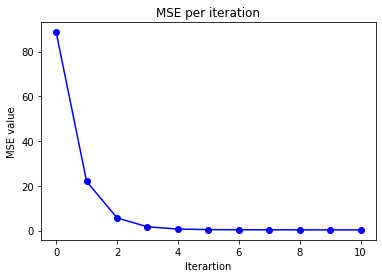

In [259]:
gd.plot()

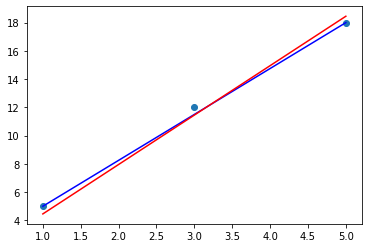

In [260]:
plt.scatter(inputs,targets)
plt.plot([min(inputs), max(inputs)],[min(targets), max(targets)], color= 'blue')
plt.plot([min(inputs), max(inputs)], [min(gd.y_pred), max(gd.y_pred)], color ='red')

In [261]:
x_new = np.array([3])
gd.predict(x_new)

array([11.47053502])

In [314]:
import os
path = os.getcwd() + '\data\homeprices_banglore.csv'
house = pd.read_csv(path)
house_x = house.iloc[:, 0:2]
house_y = house.iloc[:,-1]
house.dtypes

area          int64
bedrooms      int64
price       float64
dtype: object

In [312]:

lr = 0.01
w = 0
b = 1
gd2 = GradientDescent(w, b, lr)
gd2.batch_gradient(house_x, house_y, 3)

TypeError: can only concatenate str (not "int") to str

In [288]:
import random
index = random.randint(0,2) 
sample_x = inputs[index]
sample_x

3